# Part 4: Feature Engineering & Selection
**Student:** Nevin Nijanthan (IT24102335)

✅ Dataset loaded successfully! Shape: (284807, 31)
✅ Created new feature: Amount_per_Time
🔹 Mutual Information Scores:


V17                0.008258
V14                0.008136
V12                0.007601
V10                0.007530
V11                0.006831
V16                0.006144
V4                 0.004976
V3                 0.004952
V18                0.004317
V9                 0.004277
V7                 0.003951
V2                 0.003228
V21                0.002452
V27                0.002444
V5                 0.002391
V6                 0.002388
V1                 0.002127
V8                 0.001898
Time               0.001875
V28                0.001871
V19                0.001472
Amount             0.001472
V20                0.001207
Amount_per_Time    0.000971
V23                0.000762
V24                0.000642
V26                0.000500
V25                0.000500
V13                0.000408
V22                0.000353
V15                0.000315
dtype: float64

🔹 Selected features (MI > 0): ['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V4', 'V3', 'V18', 'V9', 'V7', 'V2', 'V21', 'V27', 'V5', 'V6', 'V1', 'V8', 'Time', 'V28', 'V19', 'Amount', 'V20', 'Amount_per_Time', 'V23', 'V24', 'V26', 'V25', 'V13', 'V22', 'V15']


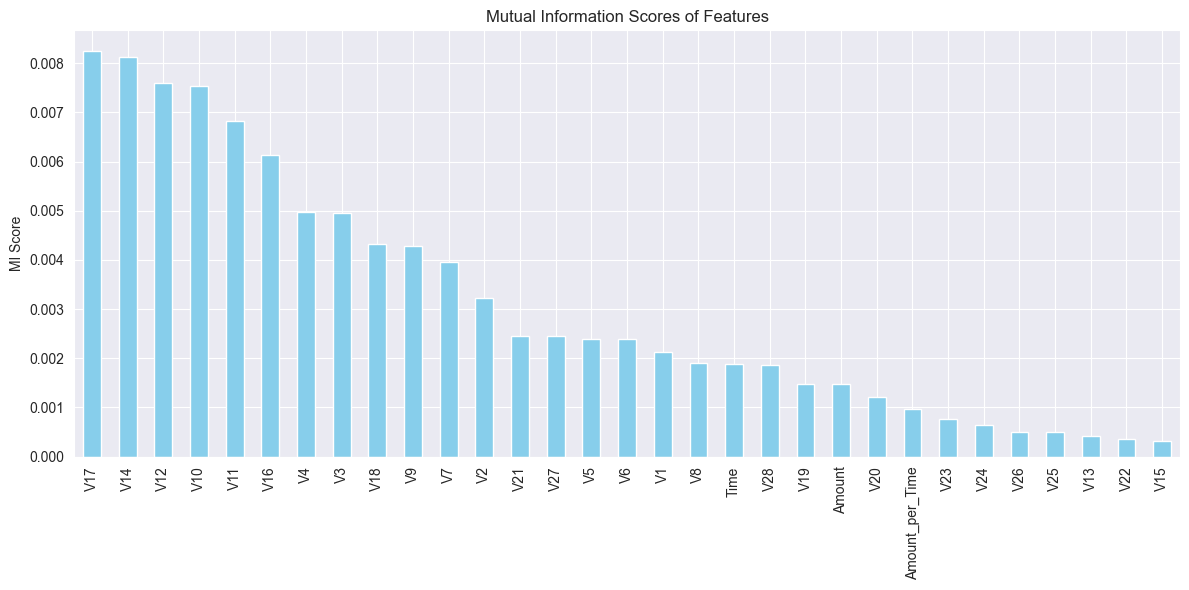

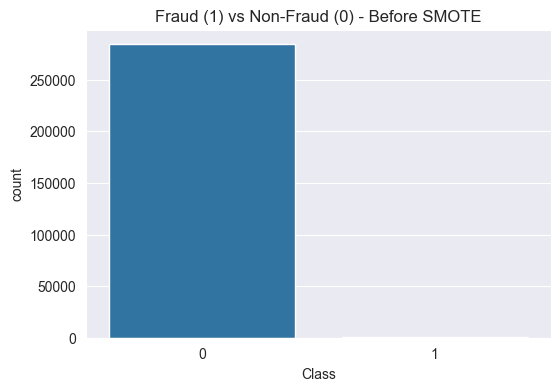

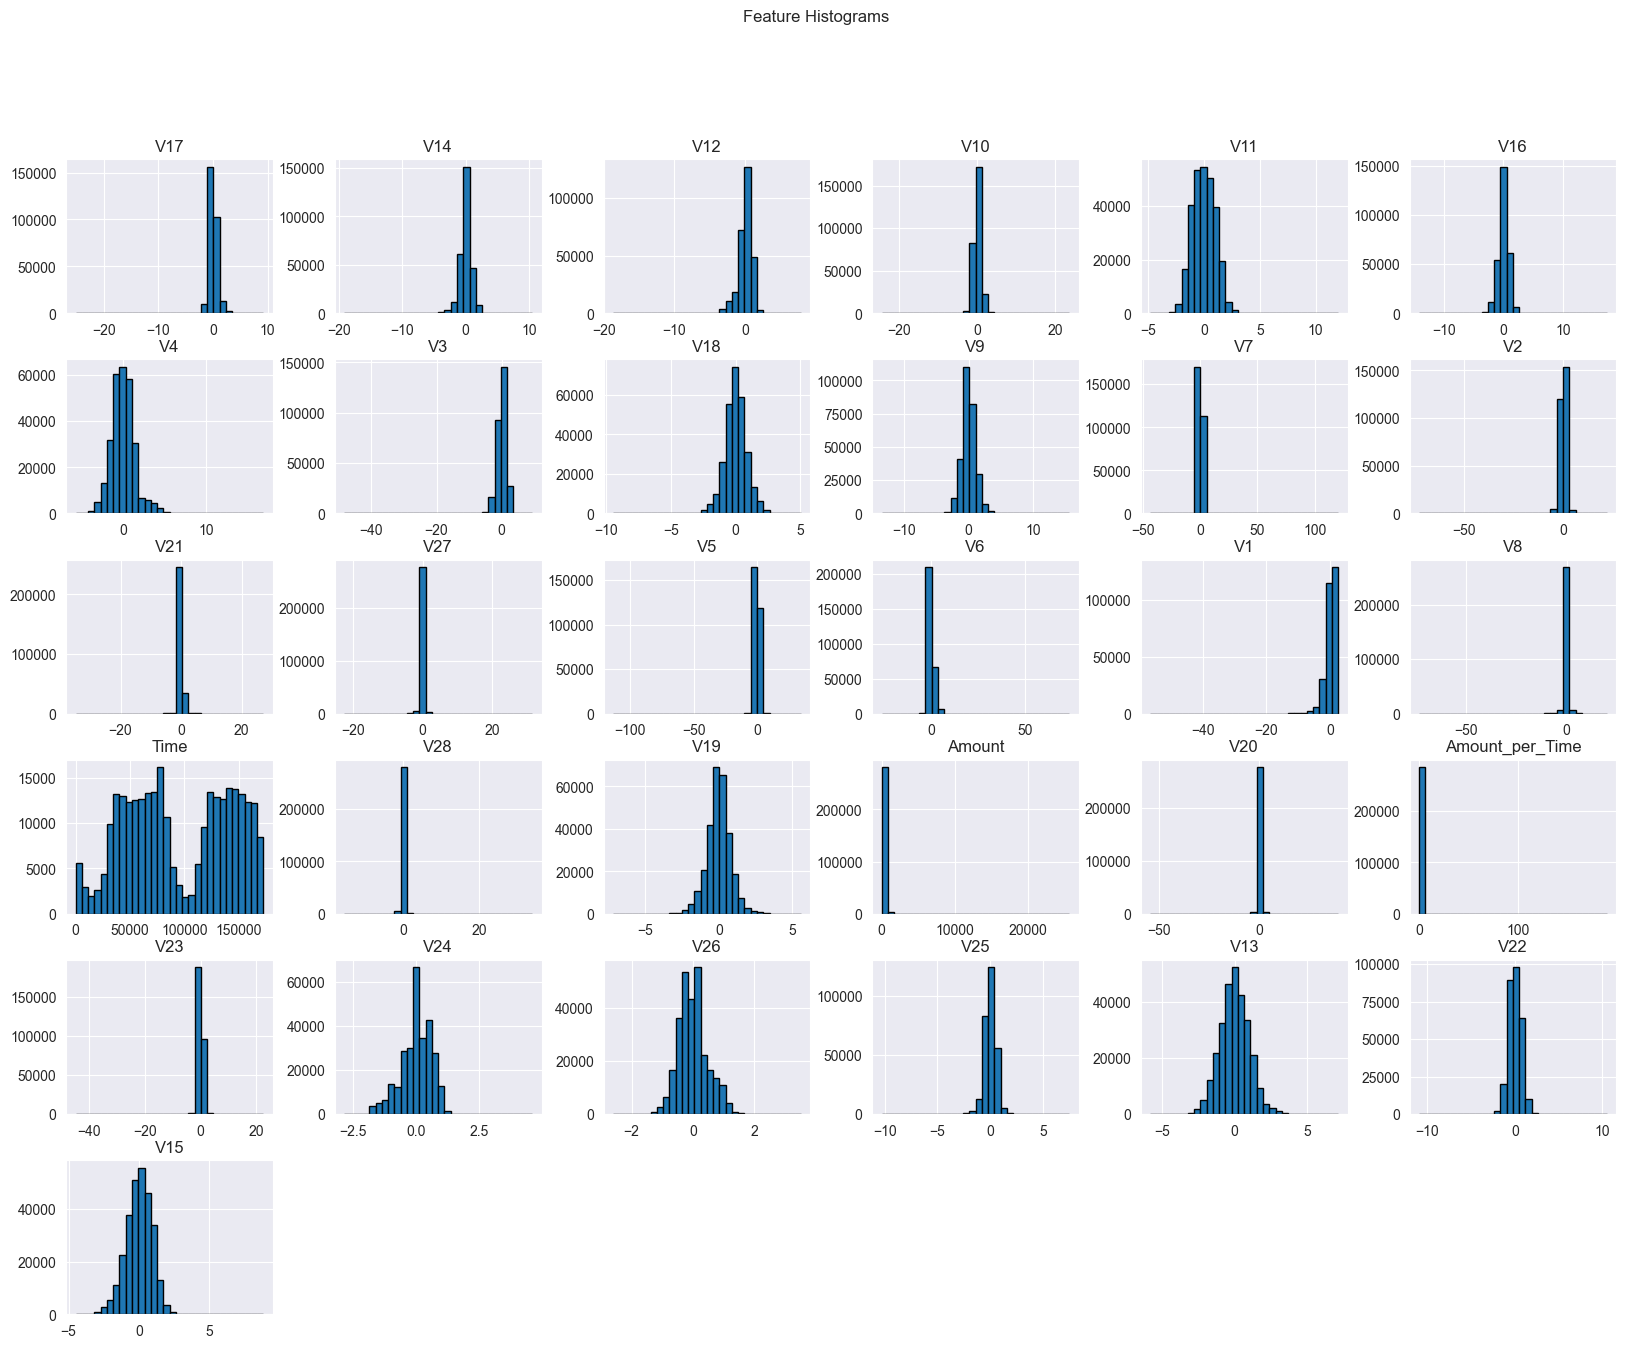

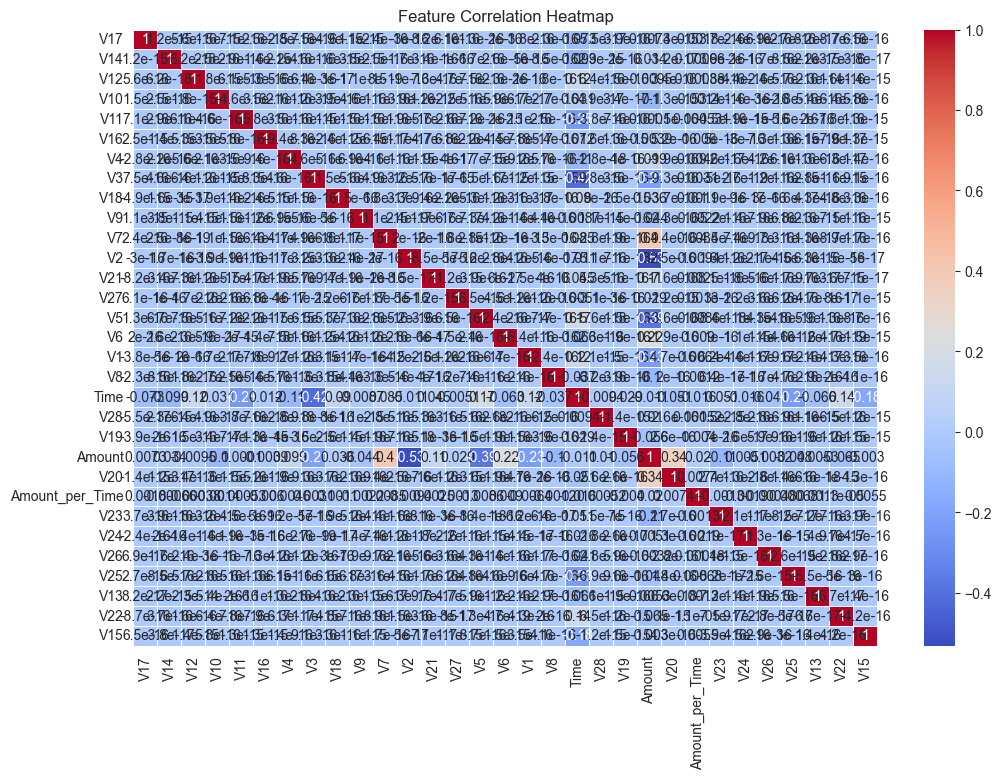

In [1]:
# ===============================
# Feature Engineering & EDA Notebook
# Author: Nevin Nijanthan
# ===============================

# --- 1. Imports ---
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# --- 2. Settings ---
members = {
    "Kishan Ahamed": "IT24103829",
    "Abhinaya Kumar": "IT24103851",
    "Lafry": "IT24103834",
    "Nevin Nijanthan": "IT24102335",
    "Indhuwara": "IT24103022",
    "Sandali": "IT24103843"
}

# Output path for visualizations
output_viz_path = "../results/eda_visualizations/"
if not os.path.exists(output_viz_path):
    os.makedirs(output_viz_path)

# Dataset path
data_path = "../data/raw/creditcard.csv"

# --- 3. Load Dataset ---
try:
    df = pd.read_csv(data_path)
    print("✅ Dataset loaded successfully! Shape:", df.shape)
except FileNotFoundError:
    print(f"❌ Error: {data_path} not found.")

# --- 4. Feature Engineering ---
if 'df' in locals():
    if 'Amount' in df.columns and 'Time' in df.columns:
        df['Amount_per_Time'] = df['Amount'] / (df['Time'] + 1)
        print("✅ Created new feature: Amount_per_Time")
    else:
        print("⚠️ Skipping feature engineering (Amount/Time not found).")

# --- 5. Mutual Information for Feature Selection ---
if 'df' in locals():
    X_temp = df.drop('Class', axis=1)
    y_temp = df['Class']

    mi_scores = mutual_info_classif(X_temp, y_temp, random_state=42)
    mi_series = pd.Series(mi_scores, index=X_temp.columns).sort_values(ascending=False)

    print("🔹 Mutual Information Scores:")
    display(mi_series)

    selected_features = mi_series[mi_series > 0].index.tolist()
    print("🔹 Selected features (MI > 0):", selected_features)

    # --- 6. Plot Mutual Information Scores ---
    plt.figure(figsize=(12,6))
    mi_series.sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title("Mutual Information Scores of Features")
    plt.ylabel("MI Score")
    plt.tight_layout()
    plt.show()
    plt.savefig(f"{output_viz_path}{members['Nevin Nijanthan']}_feature_engineering.png")
    plt.close()

    # --- 7. Class Distribution ---
    plt.figure(figsize=(6,4))
    sns.countplot(x='Class', data=df)
    plt.title("Fraud (1) vs Non-Fraud (0) - Before SMOTE")
    plt.show()
    plt.savefig(f"{output_viz_path}{members['Nevin Nijanthan']}_class_distribution_before_smote.png")
    plt.close()

    # --- 8. Feature Histograms ---
    df[selected_features].hist(figsize=(20, 15), bins=30, edgecolor='black')
    plt.suptitle("Feature Histograms")
    plt.show()
    plt.savefig(f"{output_viz_path}{members['Nevin Nijanthan']}_feature_histograms.png")
    plt.close()

    # --- 9. Correlation Heatmap ---
    plt.figure(figsize=(12, 8))
    corr = df[selected_features].corr()
    sns.heatmap(corr, cmap='coolwarm', linewidths=0.5, annot=True)
    plt.title("Feature Correlation Heatmap")
    plt.show()
    plt.savefig(f"{output_viz_path}{members['Nevin Nijanthan']}_feature_correlation_heatmap.png")
    plt.close()
